In [1]:
from LIMxCMBL.init import *
from LIMxCMBL.noise import *
from scipy.signal.windows import dpss
import sys

n_external = 6001

zmin = 1
zmax = 5

chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

# get CMB lensing component
from LIMxCMBL.kernels import get_f_Kkappa
f_WkD = get_f_Kkappa()

from LIMxCMBL.cross_spectrum import *
ClKK = d_chib_integral(f_WkD, f_WkD) #[Mpc]^2


# beam=1.4, noise=7
from scipy.interpolate import interp1d
N0_ells = np.logspace(1, np.log10(5000), 500)
with open('LIMxCMBL/N0.npy', 'rb') as f:
    N0 = np.load(f)
    
f_N0 = interp1d(x = N0_ells, y = N0)


# if no high pass IKappa
from  LIMxCMBL.kernels import *
f_KLIM   = get_f_KI()
f_Kkappa = get_f_Kkappa()

f_KLIM_windowed = apply_window(f_K = f_KLIM,
                               chimin = chimin,
                               chimax = chimax)

In [2]:
external_chis = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), n_external)

In [3]:
from scipy.interpolate import LinearNDInterpolator


In [4]:
tmp_chibs = []
tmp_log_deltas = []
tmp_fnctn = []
for i in range(len(chibs)):
    for j in range(len(deltas)):
        tmp_chibs += [chibs[i]]
        tmp_log_deltas += [np.log10(deltas[j])]
        tmp_fnctn += [inner_dkparp_integral[:,i,j]]
        
new_f_inner_integral = LinearNDInterpolator(list(zip(tmp_chibs, tmp_log_deltas)), tmp_fnctn)

In [5]:
X, Y = np.meshgrid(chibs, np.log10(deltas))
new_f_inner_integral(X, Y).shape

(128, 256, 100)

In [6]:
def f_unfiltered_auto(chi, chip):
    ret = 4/(chi + chip)**2
    ret *= f_KLIM_windowed(chi) * f_KLIM_windowed(chip)
    _delta = np.abs((chi - chip) / (chi + chip))
    
    ### bound delta
    _delta = np.where(_delta > 0.7, 0.7, _delta)
    _delta = np.where(_delta < 1e-6, 1e-6, _delta)
    
    _chib  = (chi + chip) / 2
    X, Y = np.meshgrid(_chib, np.log10(_delta))
    return ret * new_f_inner_integral(X,Y)

In [7]:
from scipy.integrate import quad_vec

In [8]:
unfiltered_auto = np.zeros((100, n_external, n_external))
for i in trange(n_external):
    for j in range(i, n_external):
        unfiltered_auto[:, i, j] = unfiltered_auto[:, j, i] = f_unfiltered_auto(external_chis[i], 
                                                                                external_chis[j])

100%|██████████| 3001/3001 [10:38<00:00,  4.70it/s] 


In [9]:
import matplotlib.pyplot as plt

In [10]:
np.save('/scratch/users/delon/LIMxCMBL/I_auto/I_auto_n_ext_%d_zmin_%.1f_zmax_%.1f.npy'%(n_external, zmin, zmax), unfiltered_auto)

0.0006581586564302865 0.0006581586564302865


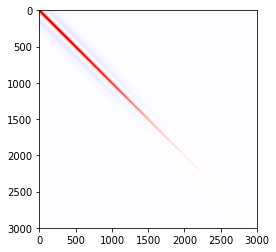

0.0006590082466067353 0.0006590082466067353


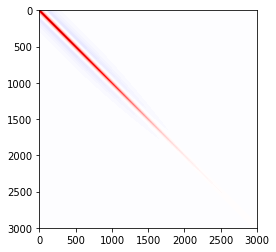

0.0006598856774420714 0.0006598856774420714


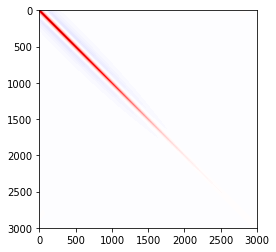

0.0006607855995707681 0.0006607855995707681


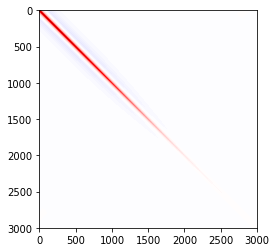

0.0006617011614021449 0.0006617011614021449


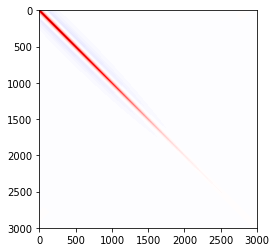

0.000662623779455478 0.000662623779455478


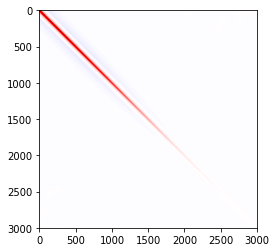

0.0006635428928707102 0.0006635428928707102


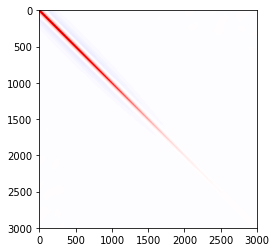

0.0006644457035226511 0.0006644457035226511


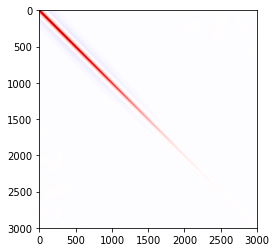

0.0006653168938028574 0.0006653168938028574


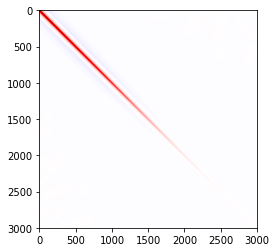

0.0006661383328812402 0.0006661383328812402


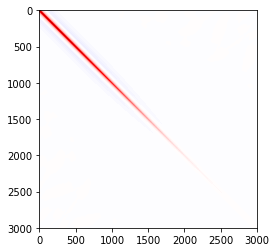

0.0006668887855247729 0.0006668887855247729


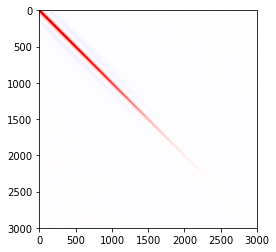

0.0006675436057972816 0.0006675436057972816


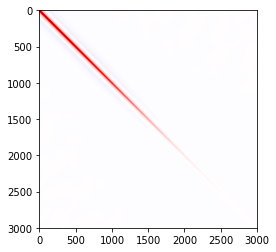

0.0006680744565834836 0.0006680744565834836


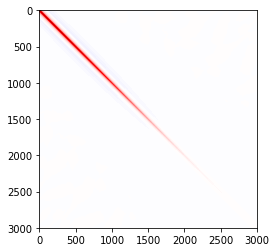

0.0006684490473544446 0.0006684490473544446


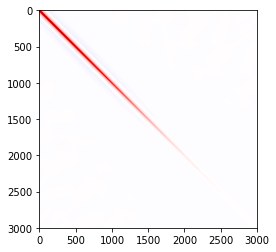

0.0006686309209606304 0.0006686309209606304


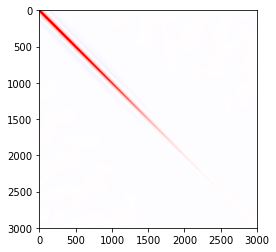

0.0006685793017842009 0.0006685793017842009


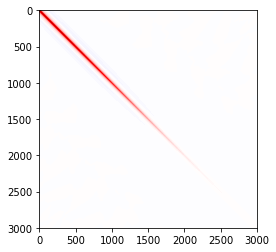

0.0006682490549001831 0.0006682490549001831


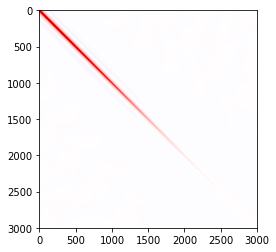

0.0006675907662477581 0.0006675907662477581


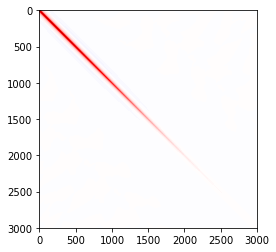

0.000666551017335358 0.000666551017335358


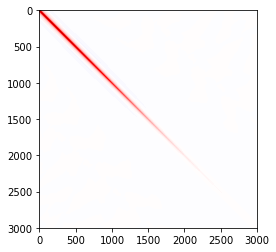

0.0006650728793323603 0.0006650728793323603


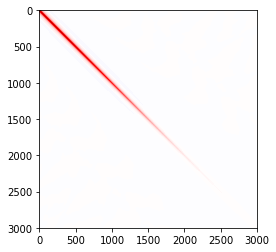

0.0006630967050181237 0.0006630967050181237


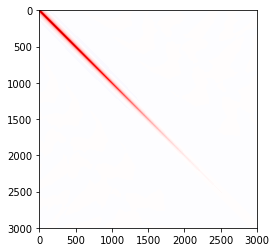

0.0006605612803423078 0.0006605612803423078


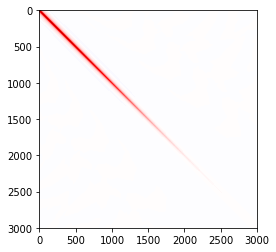

0.0006574053566518112 0.0006574053566518112


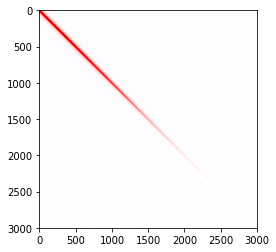

0.0006535696962563317 0.0006535696962563317


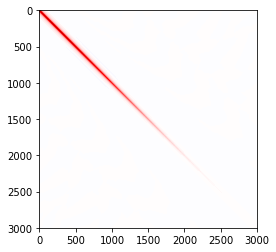

0.0006492326925192964 0.0006492326925192964


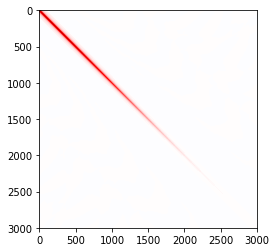

0.0006442777218335075 0.0006442777218335075


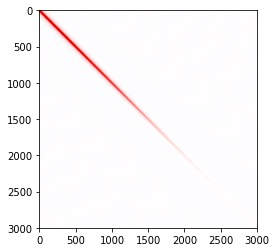

0.0006385229058683441 0.0006385229058683441


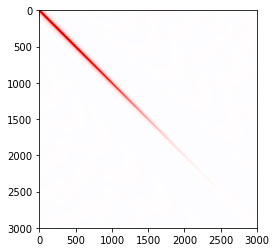

0.0006319393817016178 0.0006319393817016178


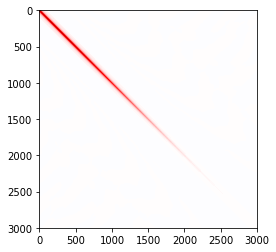

0.0006246304624753509 0.0006246304624753509


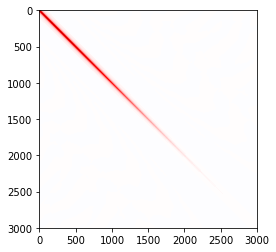

0.0006165353257697841 0.0006165353257697841


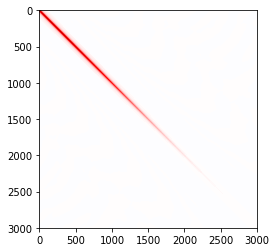

0.0006076406309412338 0.0006076406309412338


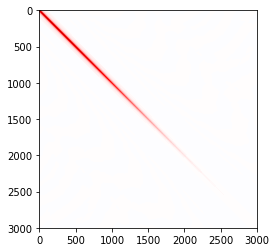

0.0005980344522680674 0.0005980344522680674


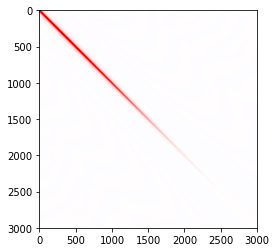

0.0005878027699720111 0.0005878027699720111


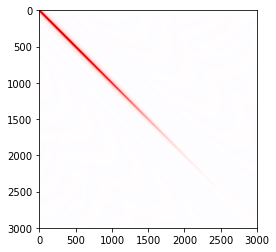

0.0005769999123986377 0.0005769999123986377


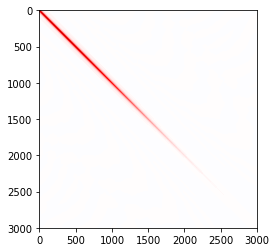

0.0005657536551308153 0.0005657536551308153


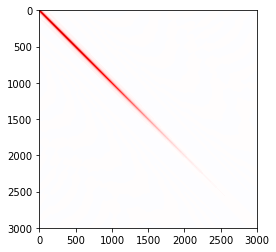

0.0005542045453323225 0.0005542045453323225


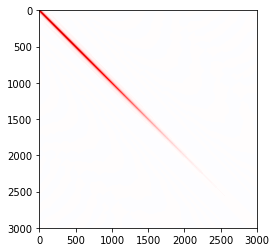

0.000542482501557493 0.000542482501557493


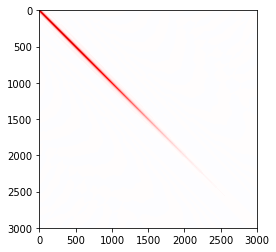

0.0005307431853513005 0.0005307431853513005


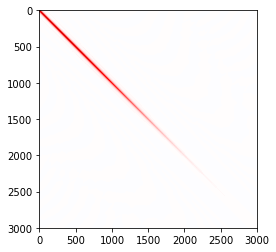

0.0005191250667169321 0.0005191250667169321


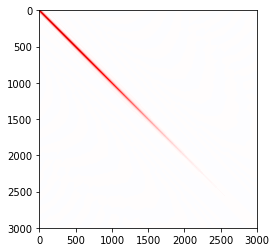

0.0005076762021393429 0.0005076762021393429


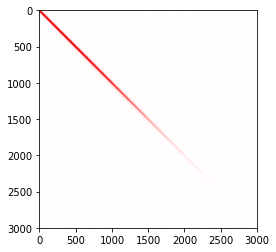

0.0004963522560365401 0.0004963522560365401


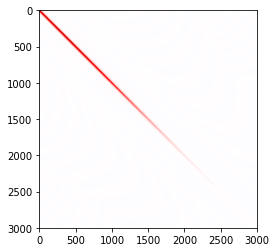

0.0004850206590055692 0.0004850206590055692


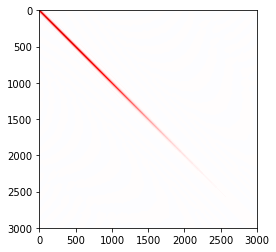

0.0004734873935509206 0.0004734873935509206


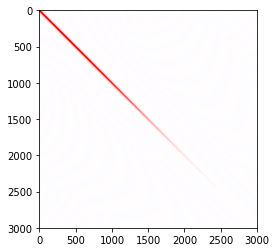

0.0004616653633421723 0.0004616653633421723


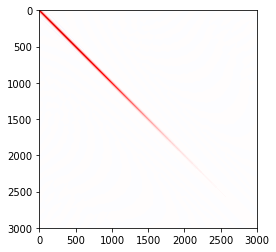

0.000449156164230794 0.000449156164230794


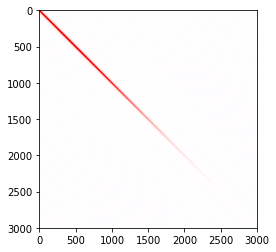

0.00043579226375952627 0.00043579226375952627


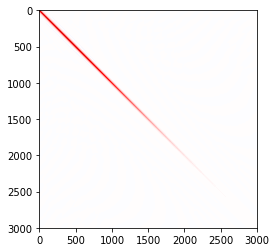

0.0004215941702968515 0.0004215941702968515


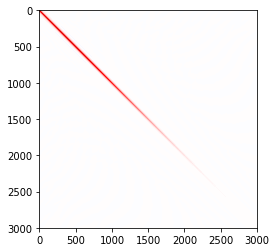

0.0004060419796461485 0.0004060419796461485


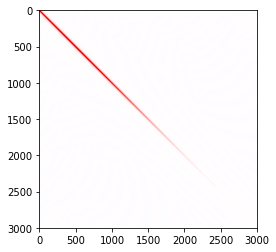

0.0003893039388720584 0.0003893039388720584


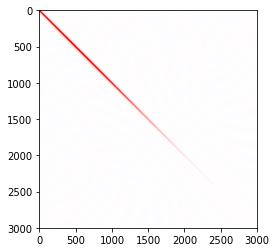

0.00037196646410350817 0.00037196646410350817


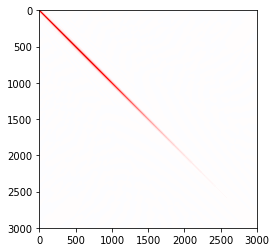

0.0003548311365328968 0.0003548311365328968


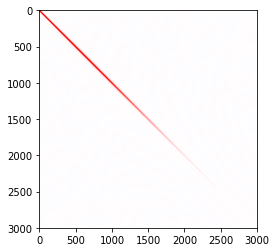

0.0003382098713579824 0.0003382098713579824


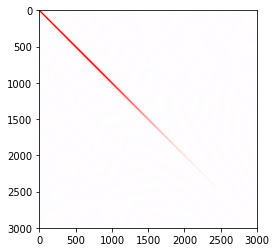

0.0003230454003395894 0.0003230454003395894


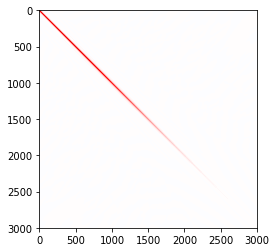

0.00030972508000890267 0.00030972508000890267


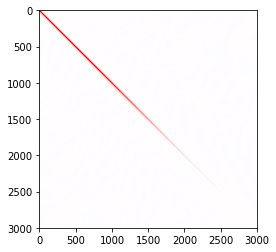

0.0002976064544068387 0.0002976064544068387


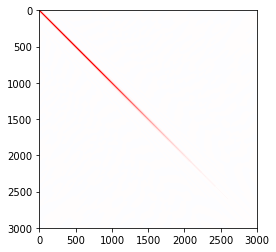

0.0002857000516518656 0.0002857000516518656


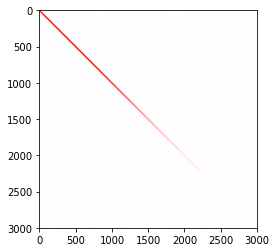

0.00027309309800886494 0.00027309309800886494


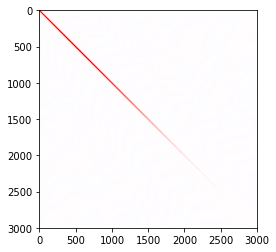

0.00025969296891815985 0.00025969296891815985


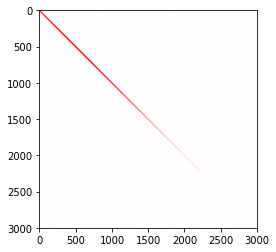

0.0002450123766802867 0.0002450123766802867


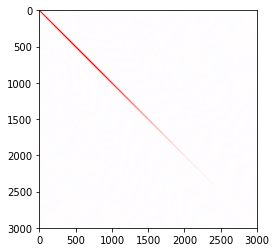

0.00023029339257126896 0.00023029339257126896


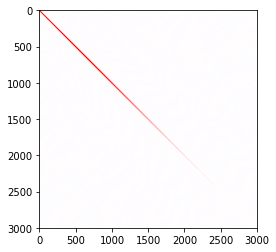

0.0002169644847214122 0.0002169644847214122


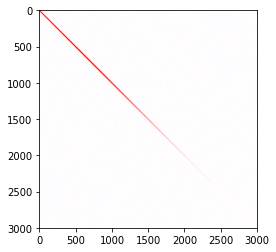

0.0002056573272347929 0.0002056573272347929


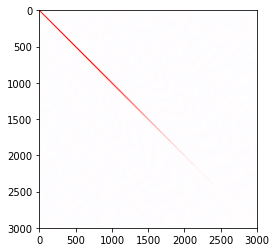

0.00019548958543364289 0.00019548958543364289


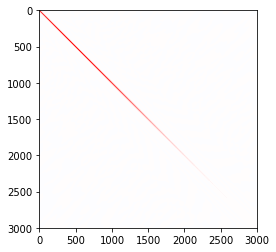

0.00018489576272769624 0.00018489576272769624


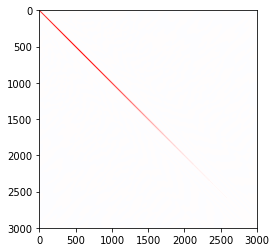

0.0001734143538960924 0.0001734143538960924


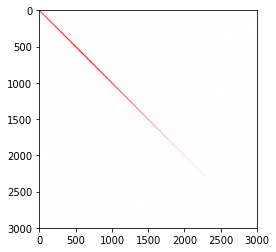

0.00016202081491194 0.00016202081491194


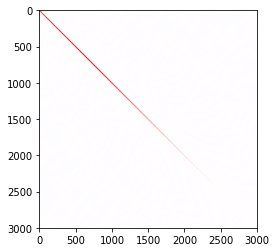

0.0001520067091876579 0.0001520067091876579


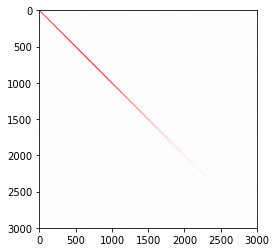

0.00014320744801411746 0.00014320744801411746


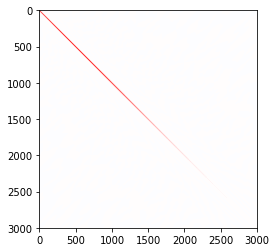

0.00013429111116101093 0.00013429111116101093


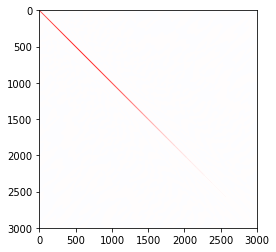

0.0001252742465230219 0.0001252742465230219


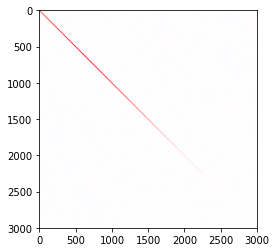

0.00011678615299928275 0.00011678615299928275


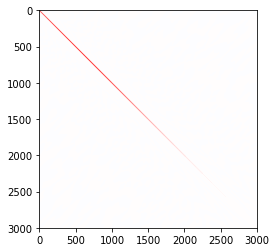

0.00010927313947594189 0.00010927313947594189


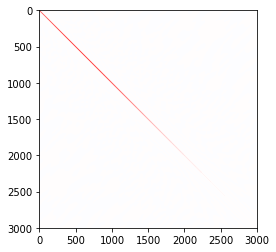

0.00010194455448588793 0.00010194455448588793


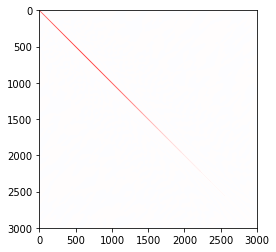

9.475672168498602e-05 9.475672168498602e-05


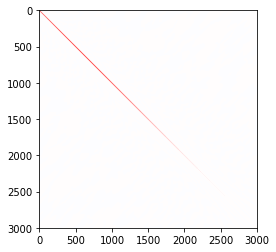

8.822252540577912e-05 8.822252540577912e-05


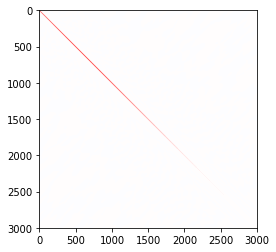

8.202098390172919e-05 8.202098390172919e-05


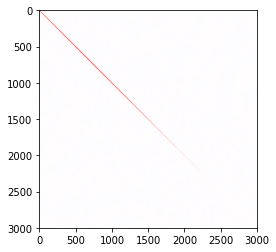

7.608747887581249e-05 7.608747887581249e-05


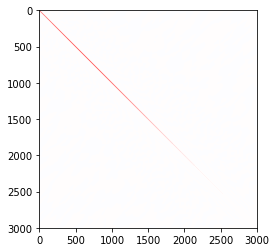

7.060766161674918e-05 7.060766161674918e-05


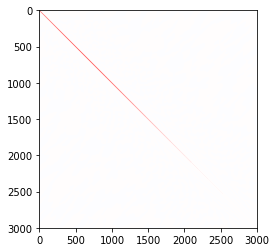

6.540279105908424e-05 6.540279105908424e-05


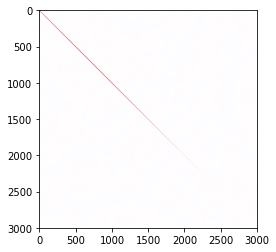

6.0549165914293927e-05 6.0549165914293927e-05


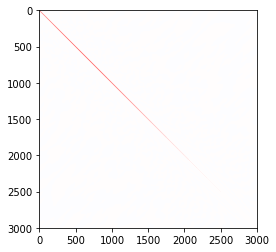

5.5994336785441684e-05 5.5994336785441684e-05


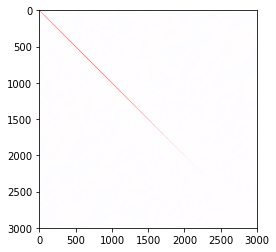

5.1739592937617246e-05 5.1739592937617246e-05


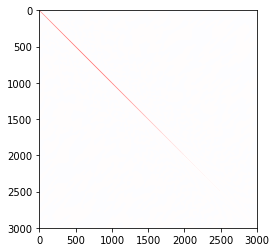

4.776371104783309e-05 4.776371104783309e-05


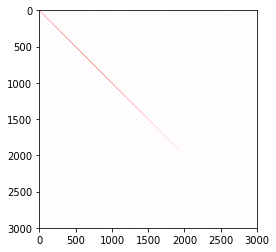

4.4058550453409705e-05 4.4058550453409705e-05


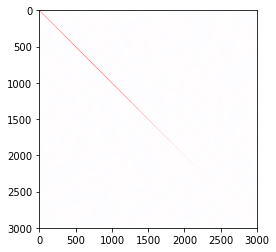

4.060542906848414e-05 4.060542906848414e-05


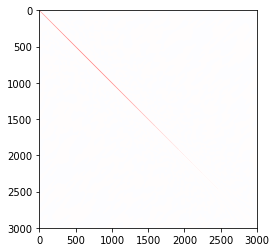

3.739117600816893e-05 3.739117600816893e-05


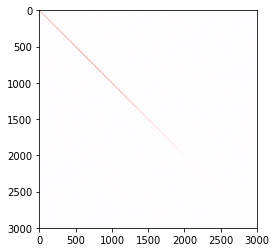

3.440942736453963e-05 3.440942736453963e-05


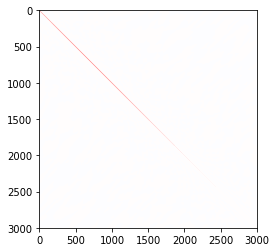

3.1645084800529865e-05 3.1645084800529865e-05


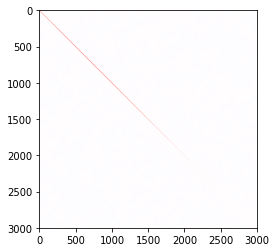

2.9081510930356527e-05 2.9081510930356527e-05


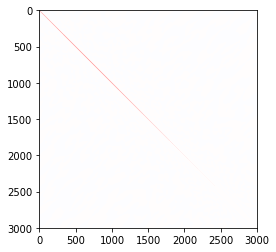

2.670617077586982e-05 2.670617077586982e-05


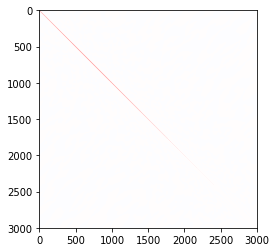

2.4507198847794988e-05 2.4507198847794988e-05


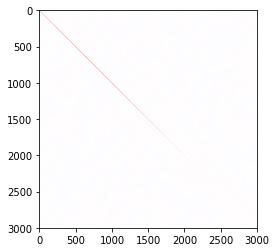

2.247344268123095e-05 2.247344268123095e-05


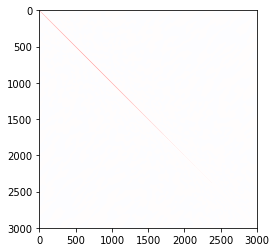

2.059438097579214e-05 2.059438097579214e-05


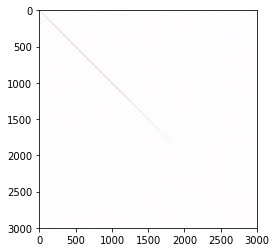

1.886000101156037e-05 1.886000101156037e-05


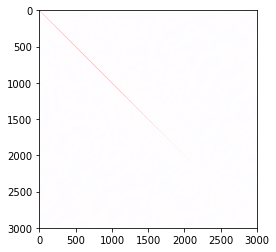

1.7260574340350863e-05 1.7260574340350863e-05


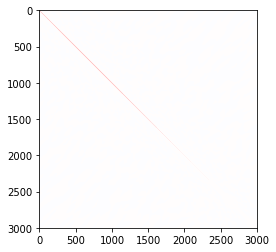

1.5786865788742776e-05 1.5786865788742776e-05


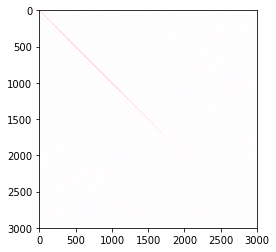

1.4430121797858729e-05 1.4430121797858729e-05


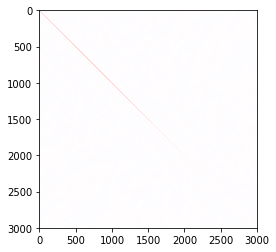

1.3182075151571942e-05 1.3182075151571942e-05


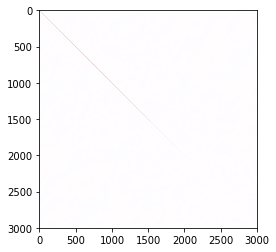

1.2034933370823075e-05 1.2034933370823075e-05


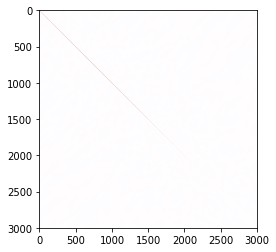

1.0981360145411486e-05 1.0981360145411486e-05


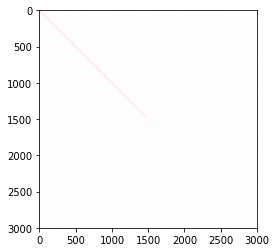

In [11]:
for ell_idx in range(len(ells)):
    vb = np.max(np.abs(unfiltered_auto[ell_idx]))
    plt.imshow(unfiltered_auto[ell_idx], vmin = -vb, vmax = vb, cmap = 'seismic')
    print(np.max(np.abs(unfiltered_auto[ell_idx])), vb)
    plt.show()